In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np
from scipy.stats import norm
from scipy.stats import kstest
from scipy.stats import ranksums
#Lendo dataset
a = pd.read_csv('ebola_2014_2016_clean.csv')
#Eliminando células vazias
a = a.dropna()
a

,Country,Date,"Cumulative no. of confirmed, probable and suspected cases","Cumulative no. of confirmed, probable and suspected deaths"
0,Guinea,2014-08-29,648.0,430.0
1,Nigeria,2014-08-29,19.0,7.0
2,Sierra Leone,2014-08-29,1026.0,422.0
3,Liberia,2014-08-29,1378.0,694.0
4,Sierra Leone,2014-09-05,1261.0,491.0
...,...,...,...,...
2480,Liberia,2016-03-23,10666.0,4806.0
2481,Italy,2016-03-23,1.0,0.0
2482,Liberia,2016-03-23,5.0,4.0
2483,Nigeria,2016-03-23,20.0,8.0


In [ ]:
#Visão geral dos dados
a.describe()

,"Cumulative no. of confirmed, probable and suspected cases","Cumulative no. of confirmed, probable and suspected deaths"
count,2477.000000,2477.000000
mean,2553.678644,1031.659265
std,4427.118148,1657.710028
min,0.000000,0.000000
25%,1.000000,0.000000
50%,8.000000,6.000000
75%,3657.000000,2387.000000
max,14122.000000,4806.000000


In [ ]:
#filtrando numero cumulativo de casos confirmados, prováveis e suspeitos
casos = a['Cumulative no. of confirmed, probable and suspected cases'].iloc[0:1000].tolist()
casos

In [ ]:
#filtrando numero cumulativo de óbitos confirmados, prováveis e suspeitos
mortes = a['Cumulative no. of confirmed, probable and suspected deaths'].iloc[0:1000].tolist()
mortes

In [ ]:
#media e desvio - casos

media1 = np.mean(casos)
desvio1 = np.std(casos)
media1, desvio1

(2489.116, 3981.174658884486)

In [ ]:
#media e desvio -  mortes

media2 = np.mean(mortes)
desvio2 = np.std(mortes)
media2, desvio2

(1010.799, 1503.7000806673518)

Teste de normalidade

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


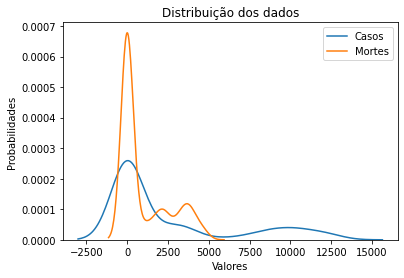

In [ ]:
sns.distplot(casos, hist=False, rug=False,label='Casos')
sns.distplot(mortes, hist=False, rug=False,label='Mortes')
plt.xlabel('Valores')
plt.ylabel('Probabilidades')
plt.title('Distribuição dos dados')
plt.legend()
plt.show()

In [ ]:
#teste de normalidade - casos
s_casos,p_casos = kstest(casos, cdf='norm', args=(media1,desvio1), N=casos)
s_casos,p_casos

(0.3662708588318677, 8.809441653198044e-121)

In [ ]:
if p_casos < 0.05:
  print('Rejeita H0')
else:
  print('Falha em Rejeitar H0')

Rejeita H0


In [ ]:
#teste de normalidade - mortes
s_mortes,p_mortes = kstest(mortes, cdf='norm', args=(media2,desvio2), N=mortes)
s_mortes,p_mortes

(0.381578047155113, 2.0021082832633396e-131)

In [ ]:
if p_mortes < 0.05:
  print('Rejeita H0')
else:
  print('Falha em Rejeitar H0')

Rejeita H0


Teste não paramétrico de Ranksums para duas amostras

In [ ]:
s,p = ranksums(casos,mortes)
s,p

(9.678373691630355, 3.725955941665196e-22)

In [ ]:
if p < 0.05:
  print('Rejeita H0')
else:
  print('Falha em rejeitar H0 (equivalentes) ')

Rejeita H0
